**Heart disease prediction**

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

**Collecting the data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
#the dataset comprises 1190 rows and 12 columns, with the last column serving as the target variable.
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.shape

(1190, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   int64   
 2   chest pain type      1190 non-null   int64   
 3   resting bp s         1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting blood sugar  1190 non-null   int64   
 6   resting ecg          1190 non-null   int64   
 7   max heart rate       1190 non-null   int64   
 8   exercise angina      1190 non-null   int64   
 9   oldpeak              1190 non-null   float64 
 10  ST slope             1190 non-null   int64   
 11  target               1190 non-null   int64   
 12  age_group            1185 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 113.1 KB


In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

**Plotting**

Univariate analysis

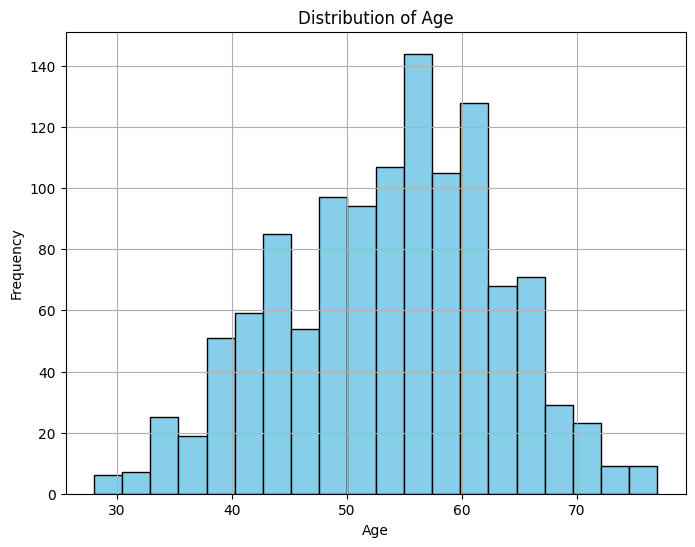

In [ ]:
# Univariate analysis of 'age' column
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

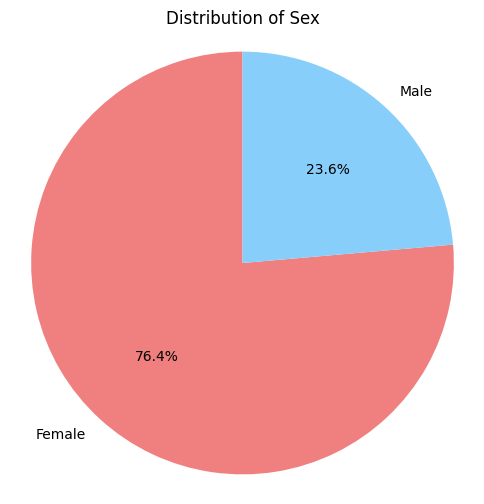

In [ ]:
# Counting occurrences of each sex
sex_counts = df['sex'].value_counts()

# Define labels for the pie chart
labels = ['Female', 'Male']

# Pie chart for distribution of 'sex' column
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=labels, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

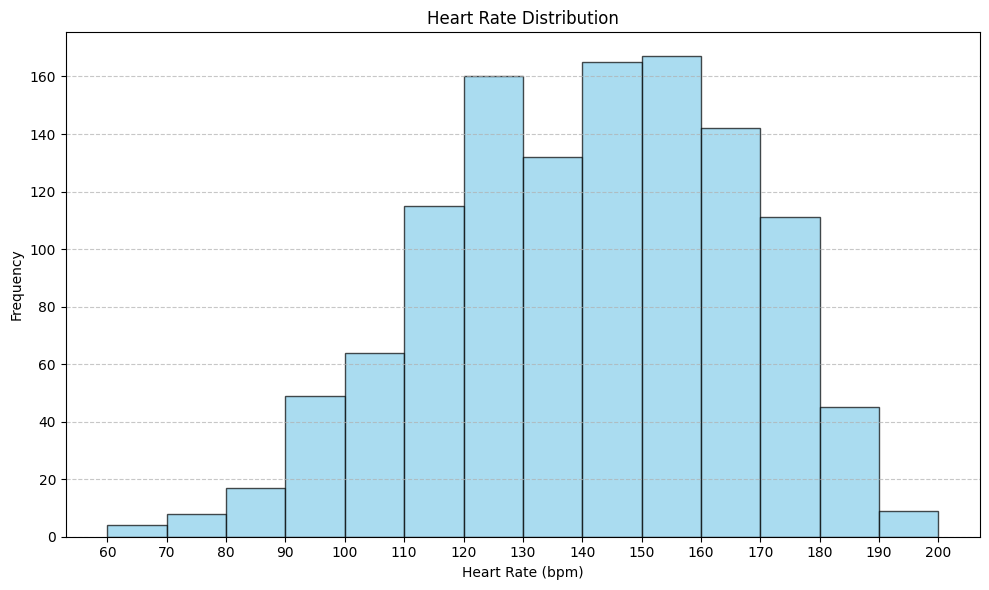

In [ ]:
#heart rate frequency
import pandas as pd
import matplotlib.pyplot as plt

# Define bins for heart rate
bins = range(60, 210, 10)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['max heart rate'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Bivariate analysis

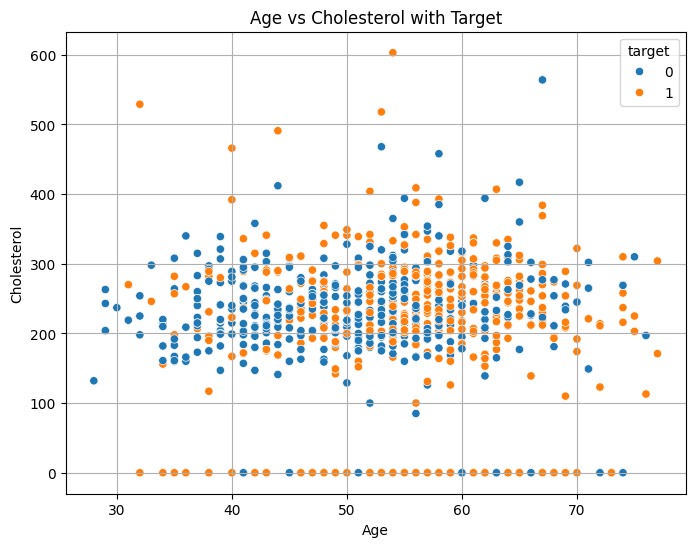

In [ ]:
# Scatter plot (Numerical vs Numerical with Target)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='cholesterol', hue='target', data=df)
plt.title('Age vs Cholesterol with Target')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

<ipython-input-15-9e81d004905d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='target', data=df, palette='Set2')


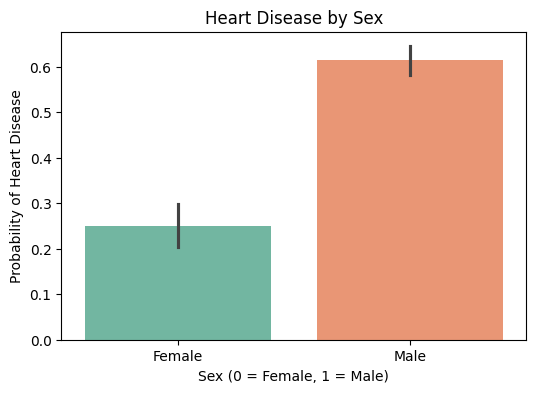

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='target', data=df, palette='Set2')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Probability of Heart Disease')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

<ipython-input-14-967692560537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='max heart rate', data=df, palette='Set2')


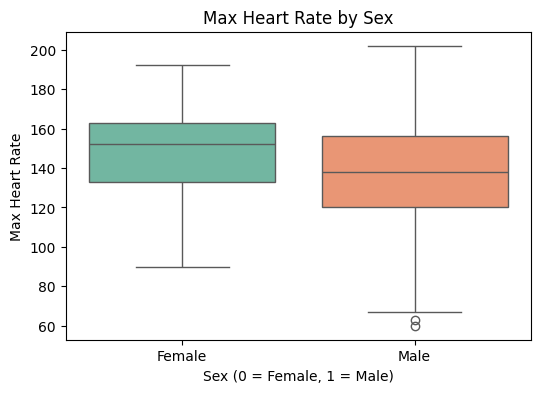

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='max heart rate', data=df, palette='Set2')
plt.title('Max Heart Rate by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Max Heart Rate')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

<ipython-input-19-d19496180c3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='max heart rate', data=df, palette='Set2')


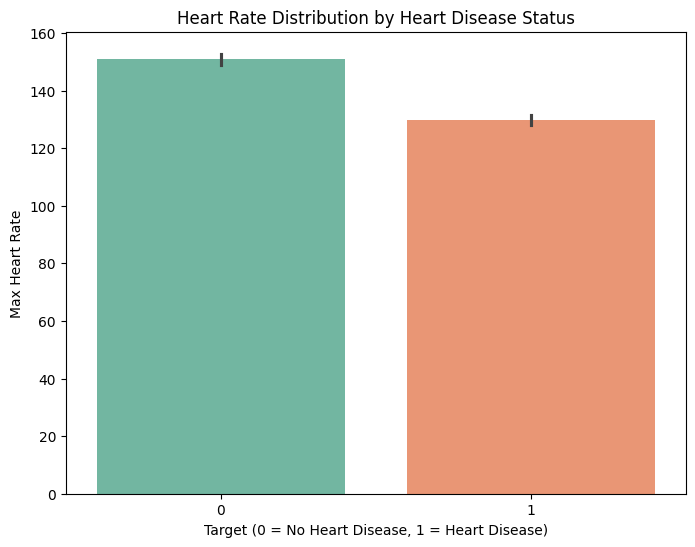

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='max heart rate', data=df, palette='Set2')
plt.title('Heart Rate Distribution by Heart Disease Status')
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Max Heart Rate')
plt.show()

<ipython-input-28-6fb1118d7d85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='chest pain type', y='max heart rate', data=df, palette='viridis')


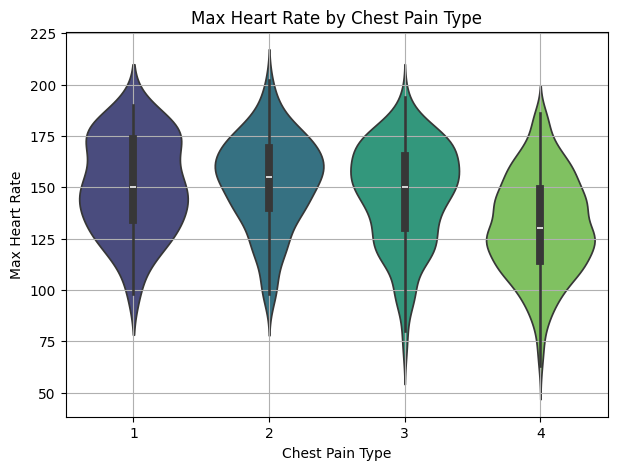

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.violinplot(x='chest pain type', y='max heart rate', data=df, palette='viridis')
plt.title('Max Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.show()

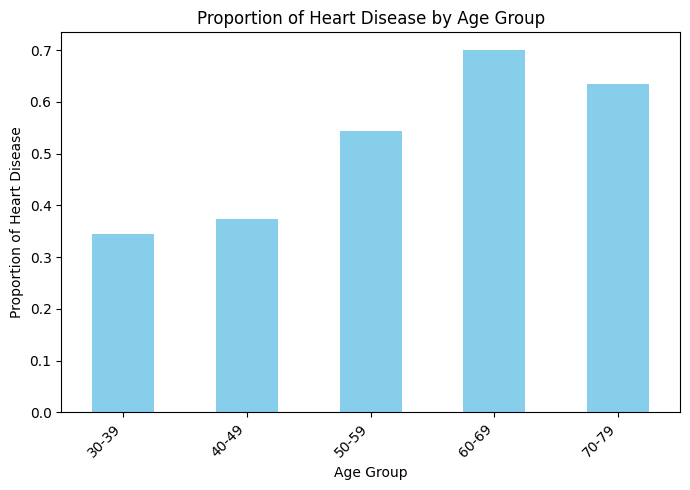

In [ ]:
#age vs heart disease
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create age bins and labels
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

# Bin the age data
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age_group and calculate the mean target value
age_group_target = df.groupby('age_group')['target'].mean()

# Plot the data
plt.figure(figsize=(7,5))
age_group_target.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Heart Disease')
plt.title('Proportion of Heart Disease by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

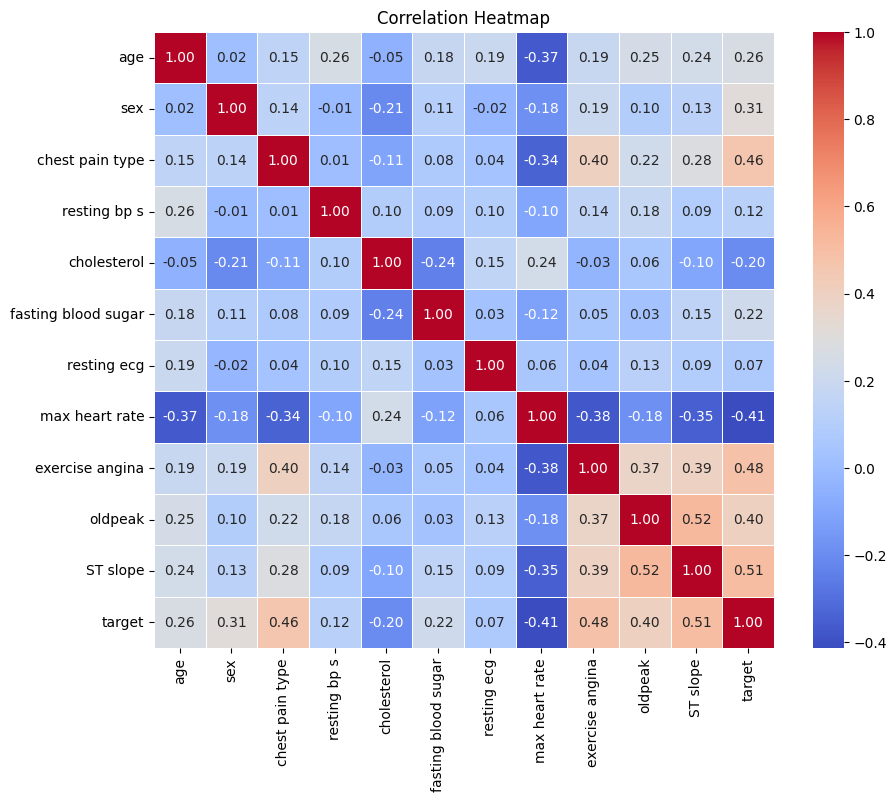

In [ ]:
#heat map of the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Prediction model**

**Separating features and target**

In [ ]:
x=df.drop(columns='target', axis=1)     #considering all the columns except label column as features
y=df['target']                          #considering label column as the target

In [ ]:
print(x)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [ ]:
print(y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


**Splitting training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.8613445378151261


**Multiple linear regression**

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Flatten the sequences for linear regression
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Create and train the model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_flatten, y_train)

# Make predictions (round to 0 or 1)
y_pred_linear = np.round(linear_regression_model.predict(X_test_flatten))

# Convert to binary predictions
y_pred_linear[y_pred_linear < 0] = 0
y_pred_linear[y_pred_linear > 1] = 1

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Multiple Linear Regression Accuracy:", accuracy_linear)


Multiple Linear Regression Accuracy: 0.8529411764705882


**kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the sequences for KNN
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Create and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_flatten)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8865546218487395


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_flatten)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9453781512605042


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_flatten)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8907563025210085


**Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_flatten)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.9159663865546218


**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_flatten)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.9033613445378151


**Comparison plot**

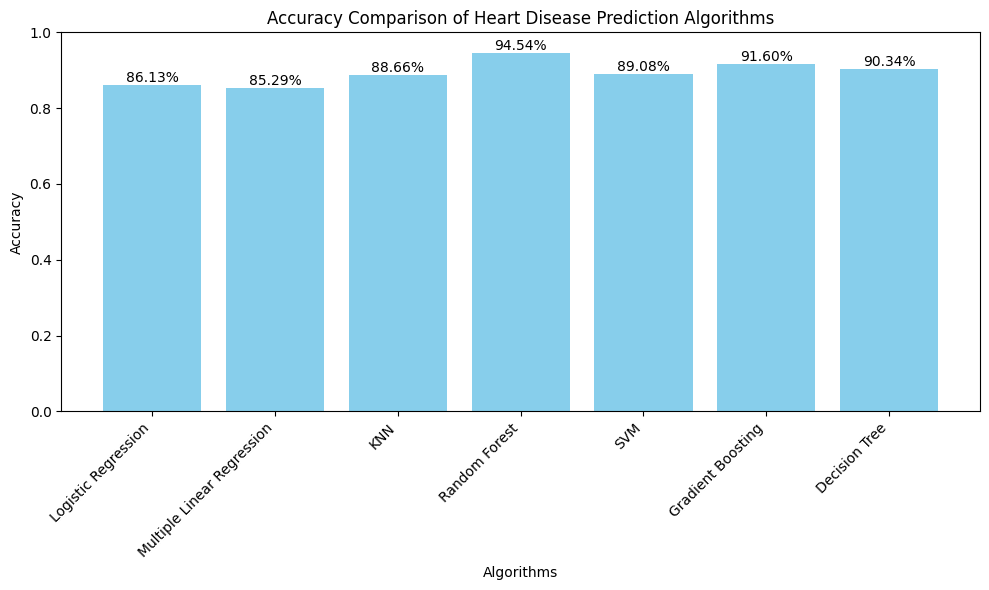

In [ ]:
import matplotlib.pyplot as plt

# List of algorithms and their accuracies
algorithms = ['Logistic Regression', 'Multiple Linear Regression', 'KNN', 'Random Forest', 'SVM', 'Gradient Boosting', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_linear, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_dt]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Heart Disease Prediction Algorithms')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add labels with percentages inside each bar
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Save random forest model and testing**


In [ ]:
from joblib import dump

# Save the model
dump(rf_model, '/content/drive/MyDrive/Datasets/random_forest_model.joblib')

['/content/drive/MyDrive/Datasets/random_forest_model.joblib']

In [ ]:
from joblib import load

#load the saved model
model = load('/content/drive/MyDrive/Datasets/random_forest_model.joblib')

In [ ]:
import numpy as np

# Define static input features (example)
input = np.array([[49, 0, 3, 160, 180, 0, 0, 156, 0, 1, 2]])

# Make predictions using the loaded model
prediction = model.predict(input)

# Map the prediction to 0 or 1
prediction_label = "Heart disease present" if prediction == 1 else "No heart disease"

# Print the prediction
print("Prediction:", prediction_label)

Prediction: Heart disease present
